<a href="https://colab.research.google.com/github/EmilSeyfullayev/Credit_Risk_Modeling_in_Python/blob/main/General_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial basic processing and cleaning

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [129]:
# data_backup = pd.read_csv("/content/drive/MyDrive/Credit Risk Modeling/loan_data_2007_2014.csv")
df = pd.read_csv("/content/drive/MyDrive/Credit Risk Modeling/loan_data_2007_2014.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
# df = data_backup.copy()

In [131]:
df.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df.describe(include='all')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,466285,438697,445277,466285,4.662810e+05,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466285.000000,466256.000000,466256,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,465909,466285.000000,239071,466243,466140.000000,98974.000000,466285.0,466285,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,205475,11,6,NaN,3,91,9,2,466285,124436,14,63099,888,50,NaN,NaN,664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,100,103,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Oct-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-16,NaN,Feb-16,Jan-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,337953,NaN,NaN,136929,31686,5399,150049,235875,NaN,168055,38782,224226,466276,1,234,274195,164075,5304,71450,NaN,NaN,3674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179620,NaN,208393,327699,NaN,NaN,NaN,466285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,NaN,NaN,NaN,NaN,7.327738e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.218758,0.284678,NaN,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,NaN,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,NaN,3123.913796,NaN,NaN,0.009085,42.852547,1.0,NaN,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,NaN,NaN,NaN,NaN,5.496357e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.851121,0.797365,NaN,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,NaN,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,NaN,5554.737393,NaN,NaN,0.108648,21.662591,0.0,NaN,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,NaN,NaN,NaN,NaN,1.896000e+03,NaN,NaN,Na

In [133]:
len(df.columns)

75

In [134]:
# pd.set_option('display.min_rows', 200)
# pd.set_option('display.max_rows', 500)
nulls_count_by_column = pd.DataFrame(
  df.isnull().sum()  
).sort_values(0, ascending=False)

In [135]:
# variables which are all nulls
nulls_count_by_column[nulls_count_by_column[0]==len(df)].index

Index(['inq_last_12m', 'total_bal_il', 'dti_joint',
       'verification_status_joint', 'annual_inc_joint', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'il_util', 'open_rv_24m', 'total_cu_tl', 'inq_fi', 'max_bal_bc',
       'all_util', 'open_rv_12m'],
      dtype='object')

In [136]:
# variables which are not all nulls
not_null_column_names = list(nulls_count_by_column[nulls_count_by_column[0]!=len(df)].index)

In [137]:
# pd.set_option('display.max_rows', 10)
df = df[not_null_column_names]

In [138]:
def unique_count_in_every_column(data):

  column_names = data.columns
  count_of_uniques = []

  for column in column_names:
    count_of_uniques.append(len(data[column].unique()))

  final_table = pd.DataFrame({
      'column_names': column_names,
      'count_of_uniques': count_of_uniques
  })
  
  final_table = final_table.sort_values('count_of_uniques')

  return final_table

In [139]:
uniqe_count_by_column = unique_count_in_every_column(df)

In [140]:
uniqe_count_by_column

,column_names,count_of_uniques
24,policy_code,1
23,application_type,1
50,initial_list_status,2
34,term,2
43,pymnt_plan,2
40,verification_status,3
39,home_ownership,6
19,acc_now_delinq,7
37,grade,7
42,loan_status,9


In [141]:
# We have to drop also at least last three columns, because are unique, and not continous
# Also we will drop first two columns, because they have only one unique value
df['url'][0] # urls require signingin, so no beneficial info it does not contain

'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501'

In [142]:
# here column names with last three column names dropped
working_column_names = list(uniqe_count_by_column['column_names'][2:-3])

In [143]:
df = df[working_column_names]

In [144]:
len(df.columns)

53

# Preprocessing

In [145]:
unique_count_in_every_column(df).head(10)

,column_names,count_of_uniques
0,initial_list_status,2
1,term,2
2,pymnt_plan,2
3,verification_status,3
4,home_ownership,6
5,acc_now_delinq,7
6,grade,7
7,loan_status,9
8,collections_12_mths_ex_med,10
9,emp_length,12


### Employment Length variable

In [146]:
list(df['emp_length'].unique())

['10+ years',
 '< 1 year',
 '1 year',
 '3 years',
 '8 years',
 '9 years',
 '4 years',
 '5 years',
 '6 years',
 '2 years',
 '7 years',
 nan]

In [147]:
df['emp_length'].fillna(0).unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 0],
      dtype=object)

In [148]:
# can use .str.extract('(\d+)') to parse numbers of column
# but nan and <1 values should have 0, but while parsing <1 will have 1
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'].fillna(str(0), inplace=True)

In [149]:
df['emp_length'].value_counts()

10+ years    150049
0             57273
2 years       41373
3 years       36596
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

In [150]:
list(df['emp_length'].str.extract('(\d+)')[0].unique())

['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7']

In [151]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)')[0]

In [152]:
df['emp_length'].value_counts()

10    150049
0      57273
2      41373
3      36596
5      30774
1      29622
4      28023
7      26180
6      26112
8      22395
9      17888
Name: emp_length, dtype: int64

In [153]:
df['emp_length'] = pd.to_numeric(df['emp_length'])

### Earliest credit line

In [154]:
df['earliest_cr_line'][0]

'Jan-85'

In [155]:
df['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [156]:
earliest_credit_line_1 = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')

In [157]:
earliest_credit_line_1

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line, Length: 466285, dtype: datetime64[ns]

In [158]:
max(earliest_credit_line_1) # here we can spot the problem

Timestamp('2068-12-01 00:00:00')

In [159]:
min(earliest_credit_line_1)

Timestamp('1969-01-01 00:00:00')

In [160]:
df['earliest_credit_line_1'] = earliest_credit_line_1

In [161]:
df['earliest_credit_line_1'][0]

Timestamp('1985-01-01 00:00:00')

(array([9.15400e+03, 4.52340e+04, 1.73251e+05, 2.29984e+05, 7.46400e+03,
        0.00000e+00, 0.00000e+00, 4.00000e+00, 4.80000e+01, 1.11700e+03]),
 array([718798. , 722447.4, 726096.8, 729746.2, 733395.6, 737045. ,
        740694.4, 744343.8, 747993.2, 751642.6, 755292. ]),
 <a list of 10 Patch objects>)

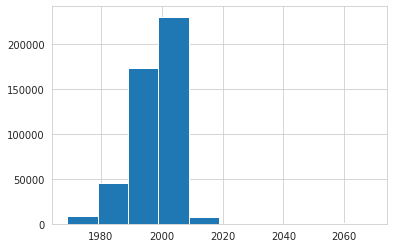

In [162]:
plt.hist(df['earliest_credit_line_1'])
# plt.xlim(left = np.datetime64('2014-01-01'))

(array([  2.,   2.,   7.,   4.,  13.,  24.,  75., 136., 322., 584.]),
 array([746191. , 747101.1, 748011.2, 748921.3, 749831.4, 750741.5,
        751651.6, 752561.7, 753471.8, 754381.9, 755292. ]),
 <a list of 10 Patch objects>)

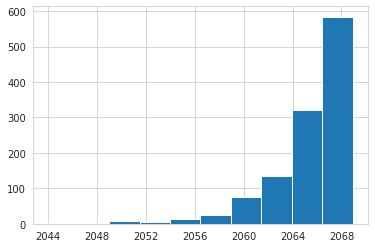

In [163]:
plt.hist(
    df[df['earliest_credit_line_1'] > np.datetime64('2015-01-01')]['earliest_credit_line_1']
)

In [164]:
# So we have to subtract 100 years from dates higher than 2015 (because our data was till 2014)
df[df['earliest_credit_line_1'] > np.datetime64('2015-01-01')]['earliest_credit_line_1'].iloc[0].date()

datetime.date(2062, 9, 1)

In [165]:
hundred_years = 75*365 + 25*366

In [166]:
from datetime import timedelta

In [167]:
# example
pd.to_datetime(df[df['earliest_credit_line_1'] > 
   np.datetime64('2015-01-01')]['earliest_credit_line_1'].iloc[0].date() - timedelta(days = hundred_years))

Timestamp('1962-09-01 00:00:00')

In [168]:
df['earliest_credit_line_2'] = df['earliest_credit_line_1'].apply(lambda x : 
                                   x.date() - timedelta(days = hundred_years) 
                                   if x > np.datetime64('2015-01-01')
                                   else x)

In [169]:
print(max(df['earliest_credit_line_1']))
print(max(df['earliest_credit_line_2']))

2068-12-01 00:00:00
2011-11-01 00:00:00


In [170]:
print(min(df['earliest_credit_line_1']))
print(min(df['earliest_credit_line_2']))

1969-01-01 00:00:00
1944-01-01 00:00:00


In [171]:
len(df.columns)

55

In [172]:
# Let's calculate difference between now and earliest credit line in months
((np.datetime64('2022-01-01') - df['earliest_credit_line_2'][0])/30).days # for one value

450

In [173]:
# earliest_credit_line_3 is the variable shows time difference in months between 2022-01-01 and earliest_credit_line
df['earliest_credit_line_3'] = df['earliest_credit_line_2'].apply(
    lambda x: (
        (np.datetime64('2022-01-01')-x)/30
    ).days
  )

In [174]:
# so we can drop 'earliest_cr_line' and 'earliest_credit_line_1'
df.drop(labels=['earliest_credit_line_1', 'earliest_cr_line'], axis=1, inplace=True)

### Term variable

In [175]:
df['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [176]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [177]:
df['term'].describe()

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [178]:
term_df = pd.get_dummies(df['term'], prefix = 'term', prefix_sep = ':', 
               #drop_first=True
               )

In [179]:
df = pd.concat([df, term_df], axis=1) # we use [] to show two dataframes

In [180]:
df.drop('term', inplace=True, axis = 1) # if we drop one column we dont use [], we use [] if we have two columns

### Issue date

In [181]:
df['issue_d'].describe()

count     466285
unique        91
top       Oct-14
freq       38782
Name: issue_d, dtype: object

In [182]:
df['issue_d'].isna().sum()

0

In [183]:
df['issue_date_1'] = pd.to_datetime(df['issue_d'], format = '%b-%y')

In [184]:
df['issue_date_2'] = df['issue_date_1'].apply(
    lambda x: round(np.float((
        (np.datetime64('2022-01-01') - x).days
    )/30))
)

In [185]:
df.drop('issue_d', axis=1, inplace=True)

### Some discrete variables

In [186]:
unique_count_in_every_column(df).head(20)

,column_names,count_of_uniques
0,initial_list_status,2
53,term: 60 months,2
52,term: 36 months,2
1,pymnt_plan,2
2,verification_status,3
3,home_ownership,6
4,acc_now_delinq,7
5,grade,7
6,loan_status,9
7,collections_12_mths_ex_med,10


In [187]:
dummies = [pd.get_dummies(df['grade'], prefix = 'grade', prefix_sep = ':'),
          pd.get_dummies(df['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
          pd.get_dummies(df['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
          pd.get_dummies(df['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
          pd.get_dummies(df['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
          pd.get_dummies(df['purpose'], prefix = 'purpose', prefix_sep = ':'),
          pd.get_dummies(df['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
          pd.get_dummies(df['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [188]:
# df.drop(
#     ['grade', 'sub_grade', 'home_ownership', 'verification_status', 
#      # 'loan_status', 
#      'purpose', 'addr_state', 'initial_list_status'], 
#      axis = 1, inplace = True
# )

In [189]:
dummies = pd.concat(dummies, axis=1)

In [190]:
df = pd.concat([df, dummies], axis=1)

In [191]:
len(df.columns)

182

### Working with missing values

In [192]:
# Variables which are missing and we need for analysis are: 
# total_rev_hi_lim, annual_inc, mths_since_earliest_cr_line, acc_now_delinq, total_acc
# pub_rec, open_acc, inq_last_6mths, delinq_2yrs, emp_length_int
pd.DataFrame(
    df.isna().sum()
).sort_values(by=0, ascending=False).head(25)

,0
mths_since_last_record,403647
mths_since_last_major_derog,367311
desc,340302
mths_since_last_delinq,250351
next_pymnt_d,227214
tot_cur_bal,70276
total_rev_hi_lim,70276
tot_coll_amt,70276
emp_title,27588
last_pymnt_d,376


In [193]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace=True) # imputes with respective value of funded_amnt

In [194]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

In [195]:
df['earliest_credit_line_2'].fillna(0, inplace=True)
df['earliest_credit_line_3'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['emp_length'].fillna(0, inplace=True)

In [196]:
# Variables which are missing and we need for analysis are: 
# total_rev_hi_lim, annual_inc, mths_since_earliest_cr_line, acc_now_delinq, total_acc
# pub_rec, open_acc, inq_last_6mths, delinq_2yrs, emp_length_int
pd.DataFrame(
    df.isna().sum()
).sort_values(by=0, ascending=False).head(15)
# according to the lecture, we will not need these varaibles for modeling

,0
mths_since_last_record,403647
mths_since_last_major_derog,367311
desc,340302
mths_since_last_delinq,250351
next_pymnt_d,227214
tot_coll_amt,70276
tot_cur_bal,70276
emp_title,27588
last_pymnt_d,376
revol_util,340


### Dependent variable, Good/Bad borrowers

In [197]:
loan_status_uniques = df['loan_status'].unique()

In [198]:
list(loan_status_uniques)

['Fully Paid',
 'Charged Off',
 'Current',
 'Default',
 'Late (31-120 days)',
 'In Grace Period',
 'Late (16-30 days)',
 'Does not meet the credit policy. Status:Fully Paid',
 'Does not meet the credit policy. Status:Charged Off']

In [199]:
print(loan_status_uniques[1])
print(loan_status_uniques[3])
print(loan_status_uniques[-3])
print(loan_status_uniques[-1])

Charged Off
Default
Late (16-30 days)
Does not meet the credit policy. Status:Charged Off


In [200]:
defaults = [
          loan_status_uniques[1], loan_status_uniques[1],
          loan_status_uniques[-3], loan_status_uniques[-1]  
]

In [201]:
good_bad_loan = np.where(
    df['loan_status'].isin(defaults),
    0, 1
)

In [202]:
df['good_bad_loan'] = good_bad_loan

In [203]:
df['good_bad_loan'].value_counts()/len(df) # 90% good loans 10% bad loans

1    0.904663
0    0.095337
Name: good_bad_loan, dtype: float64

In [204]:
list(df.columns)

['initial_list_status',
 'pymnt_plan',
 'verification_status',
 'home_ownership',
 'acc_now_delinq',
 'grade',
 'loan_status',
 'collections_12_mths_ex_med',
 'emp_length',
 'purpose',
 'delinq_2yrs',
 'pub_rec',
 'inq_last_6mths',
 'sub_grade',
 'addr_state',
 'open_acc',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'total_acc',
 'mths_since_last_record',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'int_rate',
 'zip_code',
 'revol_util',
 'loan_amnt',
 'funded_amnt',
 'dti',
 'total_rec_late_fee',
 'tot_coll_amt',
 'funded_amnt_inv',
 'total_rev_hi_lim',
 'collection_recovery_fee',
 'recoveries',
 'annual_inc',
 'installment',
 'revol_bal',
 'title',
 'desc',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_prncp',
 'last_pymnt_amnt',
 'emp_title',
 'tot_cur_bal',
 'total_rec_int',
 'total_pymnt_inv',
 'total_pymnt',
 'id',
 'earliest_credit_line_2',
 'earliest_credit_line_3',
 'term: 36 months',
 'term: 60 months',
 'issue_date_1',
 'issue_date_2',
 'grade:A',

In [205]:
X = df.drop('loan_status', axis=1)
y = df['good_bad_loan']

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [208]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(312410, 182)
(153875, 182)
(312410,)
(153875,)


In [222]:
bad = np.where(df['good_bad_loan']== 1, 0, 1)
good = df['good_bad_loan']
sum(good + bad) == len(df) # if true, the we correctly converted

df['good'] = good
df['bad'] = bad

In [210]:
df_grade = pd.DataFrame()
df_grade['grade'] = df['grade']
df_grade['good'] = good
df_grade['bad'] = bad

In [211]:
df_grade = df_grade.groupby(df_grade.columns[0], as_index=False).sum()

In [212]:
df_grade['sum'] = df_grade['good'] + df_grade['bad']

In [213]:
good_sum = df_grade['good'].sum()

In [214]:
df_grade['proportion_of_good'] = df_grade['good']/df_grade['good'].sum()
df_grade['proportion_of_bad'] = df_grade['bad']/df_grade['bad'].sum()
df_grade

,grade,good,bad,sum,proportion_of_good,proportion_of_bad
0,A,72274,2593,74867,0.171334,0.058330
1,B,127438,9491,136929,0.302107,0.213502
2,C,112865,12428,125293,0.267560,0.279570
3,D,66659,10229,76888,0.158023,0.230103
4,E,29714,6043,35757,0.070441,0.135938
5,F,10376,2853,13229,0.024598,0.064179
6,G,2505,817,3322,0.005938,0.018379


In [215]:
import numpy as np

In [216]:
df_grade['Weight_of_Evidence'] = np.log(
    df_grade['proportion_of_good']/df_grade['proportion_of_bad']
)
df_grade

,grade,good,bad,sum,proportion_of_good,proportion_of_bad,Weight_of_Evidence
0,A,72274,2593,74867,0.171334,0.058330,1.077499
1,B,127438,9491,136929,0.302107,0.213502,0.347136
2,C,112865,12428,125293,0.267560,0.279570,-0.043909
3,D,66659,10229,76888,0.158023,0.230103,-0.375787
4,E,29714,6043,35757,0.070441,0.135938,-0.657432
5,F,10376,2853,13229,0.024598,0.064179,-0.959025
6,G,2505,817,3322,0.005938,0.018379,-1.129745


In [217]:
df_grade['Information_value'] = (
    df_grade['proportion_of_good'] - df_grade['proportion_of_bad']
) * df_grade['Weight_of_Evidence']

df_grade['Information_value'] = df_grade['Information_value'].sum()

df_grade

,grade,good,bad,sum,proportion_of_good,proportion_of_bad,Weight_of_Evidence,Information_value
0,A,72274,2593,74867,0.171334,0.058330,1.077499,0.275208
1,B,127438,9491,136929,0.302107,0.213502,0.347136,0.275208
2,C,112865,12428,125293,0.267560,0.279570,-0.043909,0.275208
3,D,66659,10229,76888,0.158023,0.230103,-0.375787,0.275208
4,E,29714,6043,35757,0.070441,0.135938,-0.657432,0.275208
5,F,10376,2853,13229,0.024598,0.064179,-0.959025,0.275208
6,G,2505,817,3322,0.005938,0.018379,-1.129745,0.275208


In [234]:
# Automating

import numpy as np

def WoE_and_IV(df, variable_name):

  table = pd.DataFrame()
  table[variable_name] = df[variable_name]
  table['good_count'] = df['good']
  table['bad_count'] = df['bad']

  table = table.groupby(table.columns[0], as_index=False).sum()

  table['proportion_of_good'] = table['good_count']/table['good_count'].sum()
  table['proportion_of_bad']  = table['bad_count'] /table['bad_count'].sum()

  table['Weight_of_Evidence'] = np.log(
      table['proportion_of_good']/table['proportion_of_bad']
  )

  table['Information_value'] = (
      table['proportion_of_good'] - table['proportion_of_bad']
  ) * table['Weight_of_Evidence']

  table['Information_value'] = table['Information_value'].sum()

  table = table.sort_values('Weight_of_Evidence', ascending = False)
  table = table.reset_index(drop=True)

  return table

In [235]:
WoE_and_IV(df, 'purpose')

,purpose,good_count,bad_count,proportion_of_good,proportion_of_bad,Weight_of_Evidence,Information_value
0,credit_card,96489,7668,0.228739,0.172493,0.282223,0.044165
1,car,4952,445,0.011739,0.010010,0.159323,0.044165
2,home_improvement,24273,2264,0.057542,0.050929,0.122082,0.044165
3,major_purchase,8974,854,0.021274,0.019211,0.102006,0.044165
4,debt_consolidation,247301,26894,0.586256,0.604985,-0.031447,0.044165
5,vacation,2216,271,0.005253,0.006096,-0.148810,0.044165
6,wedding,2065,278,0.004895,0.006254,-0.244885,0.044165
7,medical,4049,553,0.009599,0.012440,-0.259283,0.044165
8,house,1987,282,0.004710,0.006344,-0.297676,0.044165
9,other,20728,2962,0.049138,0.066631,-0.304529,0.044165
